# 梯度下降
## 1 算法简介

>思考：我们给出一组房子面积，卧室数目以及对应房价数据，如何从数据中找到房价y与面积x<sub>1</sub>和卧室数目x<sub>2</sub>的关系？

![intropic](./Img/intro.png)
为了实现监督学习，我们选择采用自变量x1、x2的线性函数来评估因变量y值，得到：
![param1](./Img/param1.png)
在公式中$\theta$<sub>1</sub>和$\theta$<sub>2</sub>分别代表自变量$x$<sub>1</sub>和$x$<sub>2</sub>的权重(weights)，$\theta$<sub>0</sub>代表偏移量。为了方便，我们将评估值写作h(x)，令x<sub>0</sub>=1，则h(x)可以写作：
![param2](./Img/param2.png)
其中n为输入样本数的数量。为了得到权重的值，我们需要令我们目前的样本数据评估出的h(x)尽可能的接近真实y值。这里我们定义误差函数(cost function)来表示h(x)和y值相接近的程度：
![param3](./Img/param3.png)
这里的系数$\frac{1}{2}$是为了后面求解偏导数时可以与系数相互抵消。我们的目的是要误差函数尽可能的小，即求解权重使误差函数尽可能小。
 <img src="./Img/pic3.png" width = "500" height = "500" alt="fig3" align=center />
如上图所示，只要自变量x沿着负梯度的方向变化，就可以到达函数的最小值了，反之，如果沿着正梯度方向变化，就可以到达函数的最大值。 
我们要求解J函数的最小值，那么就要求出每个$\theta_{j}(j=0,1,2...n)$的梯度，由于梯度太大，可能会导致自变量沿着负梯度方向变化时，J的值出现震荡，而不是一直变小，所以在梯度的前面乘上一个很小的系数$\alpha$（学习率），对初始化的系数进行更新： 
![param4](./Img/param4.png)
梯度计算公式（即偏导数）：
![param5](./Img/param5.png)
不断对系数进行更新，直至收敛（$\theta_{j}$的值几乎不发生变化），公式中m为数据样本的组数，i为第i组数据：
![algo1](./Img/Algo1.png)
最后得到的$\theta_{j}$便是最终我们需要求解的线性方程的系数。

## 2 代码示例
首先先假设现在我们需要求解目标函数$func(x) = x * x$的极小值，由于func是一个凸函数，因此它唯一的极小值同时也是它的最小值，其一阶导函数为$dfunc(x) = 2 * x$

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 目标函数:y=x^2
def func(x):
    return np.square(x)


# 目标函数一阶导数也即是偏导数:dy/dx=2*x
def dfunc(x):
    return 2 * x

接下来编写梯度下降法函数：

In [5]:
# Gradient Descent
def GD(x_start, df, epochs, lr):
    """
    梯度下降法。给定起始点与目标函数的一阶导函数，求在epochs次迭代中x的更新值
    :param x_start: x的起始点
    :param df: 目标函数的一阶导函数
    :param epochs: 迭代周期
    :param lr: 学习率
    :return: x在每次迭代后的位置（包括起始点），长度为epochs+1
    """
    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        # v表示x要改变的幅度
        v = - dx * lr
        x += v
        xs[i+1] = x
    return xs

在demo_GD中，我们直观地展示了如何利用梯度下降法的搜索过程：

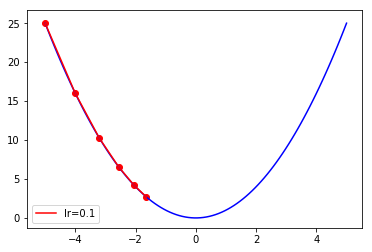

In [6]:
def demo_GD():
    # 演示如何使用梯度下降法GD()
    line_x = np.linspace(-5, 5, 100)
    line_y = func(line_x)

    x_start = -5
    epochs = 5

    lr = 0.1
    x = GD(x_start, dfunc, epochs, lr=lr)

    color = 'r'
    plt.plot(line_x, line_y, c='b')
    plt.plot(x, func(x), c=color, label='lr={}'.format(lr))
    plt.scatter(x, func(x), c=color, )
    plt.legend()
    plt.show()
demo_GD()

从运行结果来看，当学习率为0.3的时候，迭代5个周期似乎便能得到不错的结果了。
> **思考：**在上述函数中，改变学习率，会对拟合的结果造成怎样的结果？请同学们尝试着将学习率(lr)改为0.1，0.5，0.9,观察上图的变化。

# 3 练习题
回到我们之前的问题，给定数据集dataSet，每一行代表一组数据记录,每组数据记录中，第一个值为房屋面积（单位：平方英尺），第二个值为房屋中的房间数，第三个值为房价（单位：千美元），试用梯度下降法，构造损失函数，在函数gradientDescent中实现房价price关于房屋面积area和房间数rooms的线性回归，返回值为线性方程$price=\theta_0 + \theta_1 * area + \theta_2 * rooms$中系数$\theta_i(i=0,1,2)$的列表。

In [156]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
dataPath = r"./Input/data1.csv"
dataSet = pd.read_csv(dataPath,header=None)
print(dataSet)
price = []
rooms = []
area = []
for data in range(0,len(dataSet)):
    area.append(dataSet[0][data])
    rooms.append(dataSet[1][data])
    price.append(dataSet[2][data])

      0  1    2
0  2104  3  400
1  1600  3  330
2  2400  3  369
3  1416  2  342
4  3000  4  540


In [220]:
def gradient_desent(x,y,alpha,times):   
    theta = np.array([1,1,1]).reshape(3,1)
    gradient = np.dot(x.T, np.dot(x,theta) - y)
    for i in range(times):
        theta = theta - alpha*gradient
        gradient = np.dot(x.T, np.dot(x,theta) - y)
    return theta
def gradientDescent(rooms, price, area,alpha,times):
    x0 = np.ones(len(rooms),dtype = np.int)
    area=np.array(area)
    rooms = np.array(rooms)
    price = np.array( price).reshape(5,1)
    x = np.vstack((x0,area,rooms))
    theta = gradient_desent(x.T,price,alpha,times)   
    return theta
alpha = 3.2e-8
times = 10
theta = gradientDescent(rooms, price, area,alpha,times)
print(theta.tolist())
alpha = 3.2e-8
times = 1000
theta = gradientDescent(rooms, price, area,alpha,times)
print(theta.tolist())
alpha = 3.2e-8
times = 10000
theta = gradientDescent(rooms, price, area,alpha,times)
print(theta.tolist())

[[0.999653399554506], [0.18170615286422553], [0.9988762448592097]]
[[1.001220759466474], [0.18170243879623754], [1.00066950683841]]
[[1.0154678784008488], [0.18167338352234877], [1.0169692119813907]]
